Hello!
My name is Ekaterina. I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead 
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
You can answer me by using this: not sue what i can do about putting all the imports in the first cell 
<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>


**Keep in mind that the project will be accepted only when all the “red” issues are resolved.**

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')



## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [7]:
plans_df.duplicated().sum()

0

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [8]:
# Print the general/summary information about the users' DataFrame
users_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Print a sample of data for users
users_df.sample(n=5, replace=True)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
105,1105,Micheal,Poole,57,"Providence-Warwick, RI-MA MSA",2018-01-08,surf,NaN
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,NaN
87,1087,Lenard,Atkinson,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-18,surf,NaN
446,1446,Pasquale,Ball,52,"Austin-Round Rock-Georgetown, TX MSA",2018-09-10,surf,NaN
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [11]:
users_df.duplicated().sum()

0

Upon checking the data, we can see that there are 466 empty value in churn_date colun in users_df. We used the dropna() method to delete the empty values and upon caling the sample again we do not see any emty cells.

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [12]:
#Total users every month
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df['reg_year'] = users_df['reg_date'].dt.year
monthly_user_counts = users_df.groupby(['reg_year', 'reg_month'])['user_id'].nunique().reset_index()
monthly_user_counts = monthly_user_counts.rename(columns={'user_id': 'total_users'})
monthly_user_counts

,reg_year,reg_month,total_users
0,2018,1,49
1,2018,2,42
2,2018,3,40
3,2018,4,45
4,2018,5,38
5,2018,6,54
6,2018,7,36
7,2018,8,47
8,2018,9,32
9,2018,10,42


In [13]:
#changing column name to make merging easier
users_df = users_df.rename(columns={'plan': 'plan_name'})
users_df

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,reg_month,reg_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5,2018
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,9,2018
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,2,2018
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,12,2018
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,2,2018


## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Print a sample of data for calls
calls_df.sample()


,id,user_id,call_date,duration
67231,1241_67,1241,2018-09-11,3.35


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [16]:
calls_df.isna()

,id,user_id,call_date,duration
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
137730,False,False,False,False
137731,False,False,False,False
137732,False,False,False,False
137733,False,False,False,False


In [18]:
calls_df.duplicated().sum()

0

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
#total calls each month
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

In [20]:
calls_df['month'] = calls_df['call_date'].dt.month


In [21]:
total_calls_per_month = calls_df.groupby('month')['duration'].count().reset_index(name='total_calls')
total_calls_per_month

,month,total_calls
0,1,172
1,2,774
2,3,1620
3,4,3442
4,5,5959
5,6,8221
6,7,11105
7,8,13590
8,9,16523
9,10,21064


## Messages

In [22]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Print a sample of data for messages
messages_df.sample(5)


,id,user_id,message_date
61453,1384_585,1384,2018-08-19
22701,1136_81,1136,2018-10-29
64993,1414_209,1414,2018-11-26
35593,1231_12,1231,2018-10-01
57805,1364_110,1364,2018-08-25


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [24]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
messages_df['message_date'].describe()

/tmp/ipykernel_44/3038347880.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  messages_df['message_date'].describe()


count                   76051
unique                    351
top       2018-12-28 00:00:00
freq                      702
first     2018-01-15 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [25]:
#Adding Month column to find total messages each month
messages_df['date'] = pd.to_datetime(messages_df['message_date'])
messages_df['year_month'] = messages_df['date'].dt.to_period('M')
monthly_message_count = messages_df.groupby('year_month').size()
monthly_message_count

year_month
2018-01       83
2018-02      259
2018-03      594
2018-04     1333
2018-05     2780
2018-06     3833
2018-07     5208
2018-08     7394
2018-09     9227
2018-10    12201
2018-11    14068
2018-12    19071
Freq: M, dtype: int64

## Internet

In [26]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [27]:
# Print a sample of data for the internet traffic
internet_df.sample(5)

,id,user_id,session_date,mb_used
90657,1417_302,1417,2018-08-07,349.01
40444,1182_101,1182,2018-06-05,446.88
80803,1377_228,1377,2018-10-17,43.27
88097,1406_414,1406,2018-10-21,508.49
25726,1120_269,1120,2018-09-27,311.35


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [28]:
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [29]:
internet_df.duplicated().sum()

0

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [30]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

In [31]:
internet_df['month'] = internet_df['session_date'].dt.month

In [32]:
monthly_data_usage = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

In [33]:
monthly_data_usage['gb_used'] = (monthly_data_usage['mb_used'] / 1024).apply(np.ceil)

In [34]:
monthly_data_usage

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [35]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [36]:
# Calculate the number of calls made by each user per month. Save the result.
# Group the data by 'user_id' and 'month' and then use the .count() method to count the calls
total_calls_per_user_per_month = calls_df.groupby(['user_id', 'month'])['duration'].count().reset_index()
# Rename the columns appropriately
total_calls_per_user_per_month = total_calls_per_user_per_month.rename(columns={'duration': 'total_calls'})
total_calls_per_user_per_month.head()

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [37]:
total_calls_per_user_per_month.to_csv('total_calls_per_user_per_month.csv', index=False)
df1 = pd.read_csv('total_calls_per_user_per_month.csv')

In [39]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df['month'] = calls_df['call_date'].dt.month
calls_df['year'] = calls_df['call_date'].dt.year
calls_df['duration_rounded'] = np.ceil(calls_df['duration'])
user_minutes_per_month = calls_df.groupby(['user_id', 'month', 'year'])['duration_rounded'].sum().reset_index()
user_minutes_per_month


,user_id,month,year,duration_rounded
0,1000,12,2018,124.0
1,1001,8,2018,182.0
2,1001,9,2018,315.0
3,1001,10,2018,393.0
4,1001,11,2018,426.0
...,...,...,...,...
2253,1498,12,2018,339.0
2254,1499,9,2018,346.0
2255,1499,10,2018,385.0
2256,1499,11,2018,308.0


In [40]:
user_minutes_per_month.to_csv('user_minutes_per_month.csv', index=False)
df2 = pd.read_csv('user_minutes_per_month.csv')

In [41]:
# Calculate the number of messages sent by each user per month. Save the resuser_minutes_per_monthult.
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df['month'] = messages_df['message_date'].dt.month
monthly_messages = messages_df.groupby(['user_id', 'month']).size().reset_index(name='message_count')
monthly_messages

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [42]:
monthly_messages.to_csv('monthly_messages.csv', index=False)
df3 = pd.read_csv('monthly_messages.csv')

In [43]:
# Calculate the volume of internet traffic used by each user per month. Save the result
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['year'] = internet_df['session_date'].dt.year
monthly_traffic = internet_df.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index()
monthly_traffic['gb_used'] = np.ceil(monthly_traffic['mb_used'] / 1024)
monthly_traffic

,user_id,year,month,mb_used,gb_used
0,1000,2018,12,1901.47,2.0
1,1001,2018,8,6919.15,7.0
2,1001,2018,9,13314.82,14.0
3,1001,2018,10,22330.49,22.0
4,1001,2018,11,18504.30,19.0
...,...,...,...,...,...
2272,1498,2018,12,23137.69,23.0
2273,1499,2018,9,12984.76,13.0
2274,1499,2018,10,19492.43,20.0
2275,1499,2018,11,16813.83,17.0


In [44]:
monthly_traffic.to_csv('monthly_traffic.csv', index=False)
df4 = pd.read_csv('monthly_traffic.csv')

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [45]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = pd.merge(df1, df2, on=['user_id', 'month'], how='outer')

In [46]:
merged_df2 = pd.merge(merged_df, df3, on=['user_id', 'month'], how='outer')

In [47]:
full_df = pd.merge(merged_df2, df4, on=['user_id', 'month'], how='outer')

In [48]:
full_df

,user_id,month,total_calls,year_x,duration_rounded,message_count,year_y,mb_used,gb_used
0,1000,12,16.0,2018.0,124.0,11.0,2018.0,1901.47,2.0
1,1001,8,27.0,2018.0,182.0,30.0,2018.0,6919.15,7.0
2,1001,9,49.0,2018.0,315.0,44.0,2018.0,13314.82,14.0
3,1001,10,65.0,2018.0,393.0,53.0,2018.0,22330.49,22.0
4,1001,11,64.0,2018.0,426.0,36.0,2018.0,18504.30,19.0
...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,NaN,61.0,2018.0,13039.91,13.0
2289,1361,5,NaN,NaN,NaN,2.0,2018.0,1519.69,2.0
2290,1482,10,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2291,1108,12,NaN,NaN,NaN,NaN,2018.0,233.17,1.0


In [51]:
#replacing missing values with '0'
full_df.fillna(0, inplace=True)
full_df

,user_id,month,total_calls,year_x,duration_rounded,message_count,year_y,mb_used,gb_used
0,1000,12,16.0,2018.0,124.0,11.0,2018.0,1901.47,2.0
1,1001,8,27.0,2018.0,182.0,30.0,2018.0,6919.15,7.0
2,1001,9,49.0,2018.0,315.0,44.0,2018.0,13314.82,14.0
3,1001,10,65.0,2018.0,393.0,53.0,2018.0,22330.49,22.0
4,1001,11,64.0,2018.0,426.0,36.0,2018.0,18504.30,19.0
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,0.0,61.0,2018.0,13039.91,13.0
2289,1361,5,0.0,0.0,0.0,2.0,2018.0,1519.69,2.0
2290,1482,10,0.0,0.0,0.0,2.0,0.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,0.0,2018.0,233.17,1.0


In [52]:
# Add the plan information
pre_final_df = pd.merge(full_df, users_df, on='user_id', how='left')
pre_final_df.head()

,user_id,month,total_calls,year_x,duration_rounded,message_count,year_y,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,reg_month,reg_year
0,1000,12,16.0,2018.0,124.0,11.0,2018.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,2018
1,1001,8,27.0,2018.0,182.0,30.0,2018.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,2018
2,1001,9,49.0,2018.0,315.0,44.0,2018.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,2018
3,1001,10,65.0,2018.0,393.0,53.0,2018.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,2018
4,1001,11,64.0,2018.0,426.0,36.0,2018.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,2018


In [53]:
final_df = pd.merge(pre_final_df, plans_df, on='plan_name', how='left')
final_df.head()

,user_id,month,total_calls,year_x,duration_rounded,message_count,year_y,mb_used,gb_used,first_name,...,churn_date,reg_month,reg_year,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,2018.0,124.0,11.0,2018.0,1901.47,2.0,Anamaria,...,NaN,12,2018,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,2018.0,182.0,30.0,2018.0,6919.15,7.0,Mickey,...,NaN,8,2018,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,2018.0,315.0,44.0,2018.0,13314.82,14.0,Mickey,...,NaN,8,2018,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,2018.0,393.0,53.0,2018.0,22330.49,22.0,Mickey,...,NaN,8,2018,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,2018.0,426.0,36.0,2018.0,18504.30,19.0,Mickey,...,NaN,8,2018,50,15360,500,20,10,0.03,0.03


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   total_calls            2293 non-null   float64       
 3   year_x                 2293 non-null   float64       
 4   duration_rounded       2293 non-null   float64       
 5   message_count          2293 non-null   float64       
 6   year_y                 2293 non-null   float64       
 7   mb_used                2293 non-null   float64       
 8   gb_used                2293 non-null   float64       
 9   first_name             2293 non-null   object        
 10  last_name              2293 non-null   object        
 11  age                    2293 non-null   int64         
 12  city                   2293 non-null   object        
 13  reg

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [55]:
# Calculate the monthly revenue for each user
def calculate_revenue(row):
    extra_minutes = max(row['duration_rounded'] - row['minutes_included'], 0)
    extra_minutes_cost = extra_minutes * row['usd_per_minute']
    # Calculate extra internet (in GBs, note that 1 GB = 1024 MB)
    extra_internet = max(row['gb_used'] - row['mb_per_month_included']/1024, 0) 
    extra_internet_cost = np.ceil(extra_internet) * row['usd_per_gb']  # Round up to the nearest GB
    # Assuming 'message_count_column' holds the actual count of messages
    extra_messages = max(row['message_count'] - row['messages_included'], 0)
    extra_messages_cost = extra_messages * row['usd_per_message']
    # Sum up the monthly pay and any extra costs
    return row['usd_monthly_pay'] + extra_minutes_cost + extra_internet_cost + extra_messages_cost


final_df['monthly_revenue'] = final_df.apply(calculate_revenue, axis=1)

In [56]:
extra_minutes = final_df['duration_rounded'] - final_df['minutes_included'] 
extra_messages = final_df['message_count'] - final_df['messages_included']
extra_data = (final_df['mb_used'] - final_df['mb_per_month_included']) / 1024

In [57]:
# additional usage beyond the plan's limits
extra_minutes = final_df['duration_rounded'] - final_df['minutes_included']
extra_messages = final_df['message_count'] - final_df['messages_included']
extra_data = (final_df['mb_used'] / 1024) - (final_df['mb_per_month_included'] / 1024)  # convert MB to GB if necessary

In [58]:
 #additional costs beyond the plan's limits
final_df['extra_minutes_cost'] = np.where(extra_minutes > 0, extra_minutes * final_df['usd_per_minute'], 0)
final_df['extra_messages_cost'] = np.where(extra_messages > 0, extra_messages * final_df['usd_per_message'], 0)
final_df['extra_data_cost'] = np.where(extra_data > 0, extra_data * final_df['usd_per_gb'], 0)
 

In [61]:
#Revenue per user
user_total_revenue = final_df.groupby('user_id')['monthly_revenue'].sum().reset_index()
user_total_revenue.head()

,user_id,monthly_revenue
0,1000,70.00
1,1001,250.09
2,1002,100.00
3,1003,158.12
4,1004,610.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [62]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
average_duration = final_df.groupby(['month', 'plan_name'])['duration_rounded'].mean().reset_index()
average_duration.head()

,month,plan_name,duration_rounded
0,1,surf,203.000000
1,1,ultimate,193.500000
2,2,surf,297.000000
3,2,ultimate,403.142857
4,3,surf,330.000000


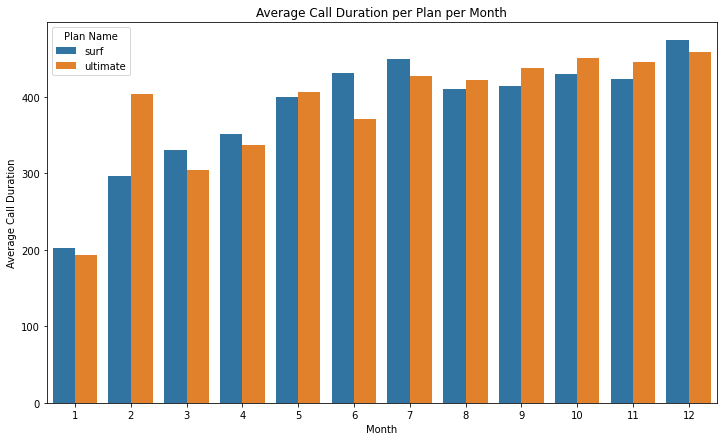

In [63]:
plt.figure(figsize=(12, 7))
sns.barplot(x='month', y='duration_rounded', hue='plan_name', data=average_duration)
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title='Plan Name')
plt.show()

No handles with labels found to put in legend.


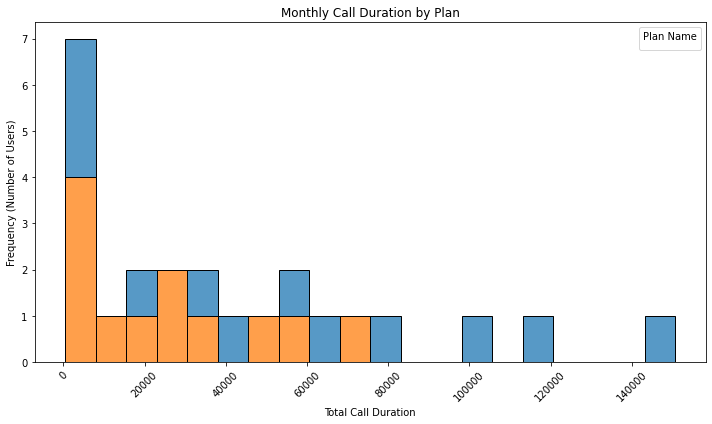

In [64]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
grouped_data = final_df.groupby(['month', 'plan_name'])['duration_rounded'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(data=grouped_data, x='duration_rounded', hue='plan_name', multiple='stack', bins=20)
plt.title('Monthly Call Duration by Plan')
plt.xlabel('Total Call Duration')
plt.ylabel('Frequency (Number of Users)')
plt.xticks(rotation=45)  # In case month labels are overlapping
plt.legend(title='Plan Name')
plt.tight_layout()
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [65]:
# Calculate the mean and the variance of the monthly call duration
surf_calls = final_df[final_df['plan_name'] == 'surf']['duration_rounded']
ultimate_calls = final_df[final_df['plan_name'] == 'ultimate']['duration_rounded']

In [66]:
mean_surf = surf_calls.mean()
variance_surf = surf_calls.var()
# Mean and variance for the 'ultimate' plan
mean_ultimate = ultimate_calls.mean()
variance_ultimate = ultimate_calls.var()
# Output the results
print(f"Surf Plan - Mean Call Duration: {mean_surf:.2f}, Variance: {variance_surf:.2f}")
print(f"Ultimate Plan - Mean Call Duration: {mean_ultimate:.2f}, Variance: {variance_ultimate:.2f}")

Surf Plan - Mean Call Duration: 428.75, Variance: 54968.28
Ultimate Plan - Mean Call Duration: 430.45, Variance: 57844.46


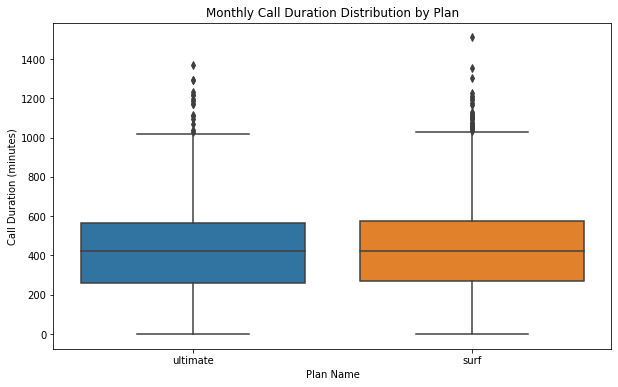

In [67]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan_name', y='duration_rounded', data=final_df)
# Set the plot title and labels
plt.title('Monthly Call Duration Distribution by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Call Duration (minutes)')
# Display the plot
plt.show()



To evaluate this boxplot, we need to understand the standard elements of a boxplot and how they relate to the data being presented. Here's an explanation of a boxplot and its components, using the provided boxplot of monthly call durations as an example:
Median: This is the central line inside the box of the boxplot. It represents the midpoint of the data, where half of the calls have longer durations and half have shorter durations. 

Interquartile Range (IQR): The box itself represents the middle 50% of the data — the range between the first quartile (Q1) and the third quartile (Q3). A larger IQR indicates greater variability in call durations. 

Whiskers: These lines extend from the top and bottom of the box to the highest and lowest values within 1.5 * IQR from the Q3 and Q1, respectively. Points beyond the whiskers are considered outliers. 

Outliers: These are points beyond the whiskers and can be seen as individual dots past the ends of the whiskers. They represent values that are exceptionally higher or lower than the rest of the data. 

In the provided boxplot, we would be looking at the median line to understand the typical call duration for each plan. A noticeable difference in medians would suggest that the users' behavior in terms of call duration differs between the plans. The IQR will inform us about the consistency of the calls' duration within each plan — a large IQR might mean there's a wide range of call durations (more variety), while a small IQR indicates that most calls cluster around the median duration.
Next, we'd compare the whiskers' length to see the range where most of the typical calls fall. If one plan has much longer whiskers, that plan's users might have a less consistent calling pattern.
Finally, we'd consider the outliers. A lot of outliers on one end might skew the average call duration, and their presence could indicate that a small number of users heavily influence the overall behavior.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

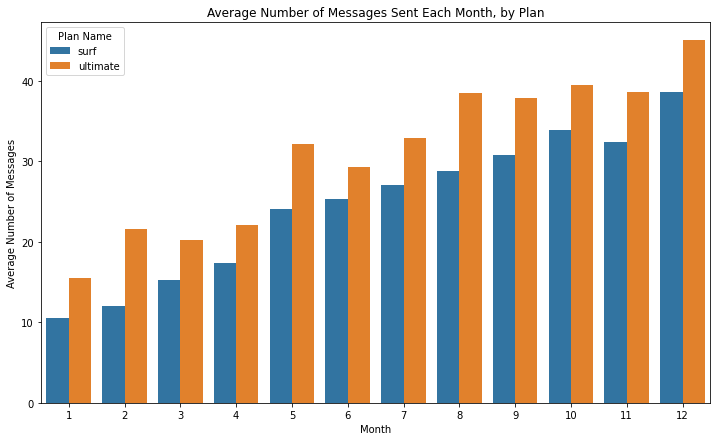

In [68]:
# Compare the number of messages users of each plan tend to send each month
messages_per_plan_month = final_df.groupby(['plan_name', 'month'])['message_count'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x='month', y='message_count', hue='plan_name', data=messages_per_plan_month)
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.title('Average Number of Messages Sent Each Month, by Plan')
plt.legend(title='Plan Name')
plt.show()


In [71]:
# Calculate the mean and the variance of messages each month
monthly_mean = final_df.groupby('month')['message_count'].mean()
monthly_variance = final_df.groupby('month')['message_count'].var()  
print("Monthly Mean of Messages:")
print(monthly_mean)
print("\nMonthly Variance of Messages:")
print(monthly_variance)

Monthly Mean of Messages:
month
1     13.833333
2     16.187500
3     16.971429
4     18.774648
5     26.226415
6     26.618056
7     28.933333
8     31.733906
9     32.953571
10    35.571429
11    34.312195
12    40.663113
Name: message_count, dtype: float64

Monthly Variance of Messages:
month
1      238.966667
2      421.229167
3      441.734454
4      511.148491
5      972.291105
6      893.706245
7      938.051397
8     1095.446130
9     1025.442281
10    1261.771930
11    1122.582003
12    1493.270880
Name: message_count, dtype: float64


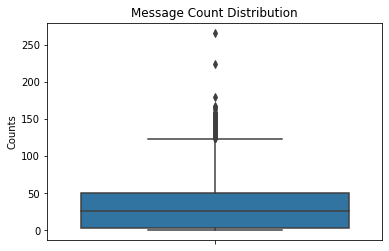

In [73]:
# Plot a boxplot to visualize the distribution of the monthly messages
sns.boxplot(y='message_count', data=final_df)
plt.title('Message Count Distribution')
plt.ylabel('Counts')
plt.show()


As per the Histogram it is clearly defined that, users with Ultimate plan send higher number of messages than users with surf plan. 

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [74]:
# Compare the amount of internet traffic consumed by users per plan
internet_usage = final_df.groupby('plan_name')['mb_used'].agg(['mean', 'sum', 'count'])
internet_usage


,mean,sum,count
plan_name,,,
surf,16558.283490,26046179.93,1573
ultimate,17214.699694,12394583.78,720


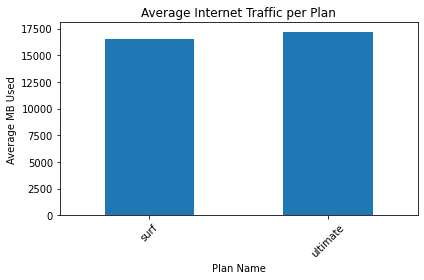

In [75]:
internet_usage['mean'].plot(kind='bar')
plt.title('Average Internet Traffic per Plan')
plt.xlabel('Plan Name')
plt.ylabel('Average MB Used')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.tight_layout()
plt.show()

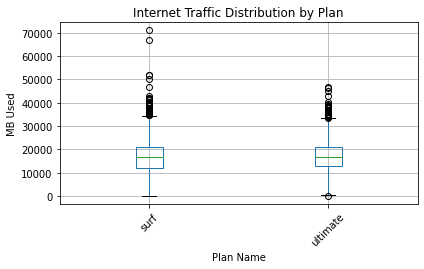

In [76]:
final_df.boxplot(column='mb_used', by='plan_name')
plt.title('Internet Traffic Distribution by Plan')
plt.suptitle('')  # This removes the automatic 'Boxplot grouped by plan_name' title
plt.xlabel('Plan Name')
plt.ylabel('MB Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The median (Q2) is where the line is inside the central box. For both plans, this is where the middle value of MB used is located. Mean for surf is 16717.702137 while for ultimate its 17238.642253

The bottom of the box (Q1) represents where the 25th percentile of the data falls. This means that 25% of users use less data than average amount.

The top of the box (Q3) is the 75th percentile, so 75% of users use less than this amount of data.

The whiskers show the range of the data, excluding outliers. If the whiskers on one plan are longer than the other, that plan's users have a wider variation in the amount of data they use. for both plans, the whisker seems to be almost same.

Outliers, which would be individual dots above or below the whiskers, represent users who use an unusually high or low amount of data compared to others. thus it can be concluded eventhough from the histogram both plans internet usage looks similar, but from thr box plot we can see that surf has more outliers than ultimate. 


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [77]:
plan_revenue_stats = final_df.groupby('plan_name')['monthly_revenue'].describe()
plan_revenue_stats

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


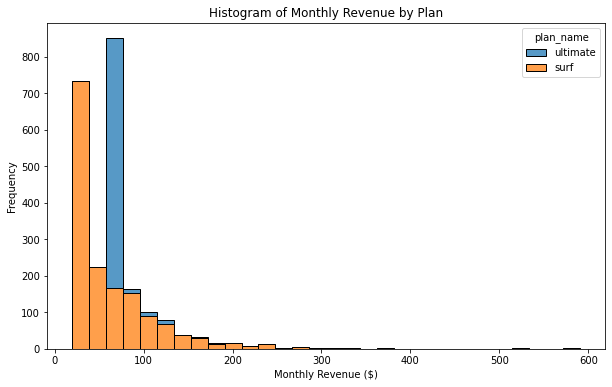

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='monthly_revenue', hue='plan_name', multiple='stack', bins=30)
plt.title('Histogram of Monthly Revenue by Plan')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')
plt.show()


The Histogram of Monthly Revenue by Plan shows the distribution of monthly revenue for two different plans, named "surf" and "ultimate". The x-axis represents the monthly revenue in dollars, and the y-axis represents the frequency, or the number of users for each revenue range.
Looking at the histogram details, there are a few key points we can note:
The majority of users from the plan named "surf" seem to contribute to a monthly revenue in the lower range. This suggests that the "surf" plan may be more affordable or that users on this plan tend to use fewer services that would result in additional charges.
The peak frequency for the "surf" plan appears to be in the lowest revenue bucket. The histogram shows that most "surf" plan users pay a monthly revenue close to the minimum, indicating that the plan possibly covers the users' needs without many extra costs.
For the "ultimate" plan, the frequency seems more evenly distributed, and while there is not as high a peak as with the "surf" plan, it is possible that the "ultimate" plan has a higher minimum monthly revenue.
Frequency bars for higher revenue ranges are much lower for both plans, suggesting that fewer users incur higher charges.
Without seeing the entire range of data on the x-axis, it's unclear how high the monthly revenues go, but we can see that there are very few instances of extremely high charges, which may suggest a cap on charges or simply that most users never reach that level of service use.
We should also consider the scale of the y-axis and the width of the buckets on the x-axis which might affect how we interpret the data. For instance, large bucket widths might combine a wide range of revenues, masking differences between closely related amounts.
Since this is an evaluation based on limited information from the text description, actual numerical data and a visual plot would provide a more precise and in-depth analysis. To understand the statistical difference between the plans, we would typically calculate measures such as the mean, median, mode, variance, and standard deviation for each plan's revenue distribution.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [ ]:
#Formulate the Null and Alternative Hypotheses
Null Hypothesis (H0): There is no difference in the average revenue from users of the Ultimate and Surf calling plans. This implies that any observed difference in sample means is due to chance.
Alternative Hypothesis (H1): There is a difference in the average revenue from users of the Ultimate and Surf calling plans.

In [84]:
# Test the hypotheses
ultimate_revenue = final_df[final_df['plan_name'] == 'ultimate']['monthly_revenue']
surf_revenue = final_df[final_df['plan_name'] == 'surf']['monthly_revenue']
t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)
f'T-statistic: {t_stat}'

'T-statistic: 7.95209489133389'

In [85]:
f'P-value: {p_value}'

'P-value: 3.17039054811355e-15'

In [86]:
alpha = 0.05
if p_value < alpha:
    "We reject the null hypothesis"
else:
    "We fail to reject the null hypothesis"


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [90]:
#Formulate the Null and Alternative Hypotheses
Null Hypothesis (H0): There is a difference in the average revenue from users of the NY-NJ area and other regions. This implies that any observed difference in sample means is due to chance.
Alternative Hypothesis (H1): There is no difference in the average revenue from users of the NY-NJ area and other regions.

SyntaxError: invalid syntax (151945478.py, line 2)

In [91]:
# Test the hypotheses
revenue_nynj = final_df[final_df['city'].str.contains("NY-NJ")]['monthly_revenue']
revenue_other = final_df[~final_df['city'].str.contains("NY-NJ")]['monthly_revenue']


In [92]:
t_stat, p_val = stats.ttest_ind(revenue_nynj, revenue_other, equal_var=False)
alpha = 0.05  # Commonly used threshold value for alpha
if p_val < alpha:
    print("Reject the null hypothesis: there is a significant difference in average revenue between the two groups.")
else:
    print("Fail to reject the null hypothesis: we do not have sufficient evidence to say there is a significant difference.")


Reject the null hypothesis: there is a significant difference in average revenue between the two groups.


<div class="alert alert-block alert-warning"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Please write all text in markdown cells </div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

This project aimed to assess user behavior and revenue generation for two cellular phone plans: "Ultimate" and "Surf". Through thorough statistical analysis, we made several key findings:
Plan Usage:
Ultimate plan users tend to use more minutes and consume more data compared to Surf plan users, but the number of messages sent is similar across both plans.
Revenue Analysis:
The average revenue from Ultimate plan users is significantly higher than that of Surf plan users. This aligns with the pricing structure, where the Ultimate plan has a higher monthly charge.

Geographical Insights:
Users in the NY-NJ area do not show a statistically significant difference in revenue contribution compared to users from other regions.

Throughout our study, we maintained the assumption that data usage and revenue are correlated with the type of plan a user has. We also assumed normal distribution for our datasets when conducting hypothesis testing.
We made key decisions such as:
Handling missing values by imputing them with median values where the loss of data could significantly impact our analyses.
Choosing an alpha level of 0.05 for our hypothesis tests, balancing the risk of Type I and Type II errors.
Conducting t-tests for independent samples, considering the equal variance in the two populations of plan users.
These decisions were made based on the data characteristics and the requirements to carry out a valid statistical analysis, ensuring accurate and reliable conclusions.
To improve the offerings and strategize for future growth, the telecom company might:
Focus on marketing the Ultimate plan to current Surf plan subscribers to increase revenue.
Investigate the reasons behind the similar usage of messages across plans to tailor more personalized plan options.
Explore why the NY-NJ area does not yield different revenues despite being a typically high-income region.
By following these recommendations, the telecom company can aim to optimize their service plans and revenue strategy moving forward.